# Assignment-13: Try various CNN networks on MNIST dataset [M]

Three different architecture of CNN network on MNIST datasets.MNIST datasets contains handwritten images .
### Objective:
        1) 3_ConvNets with kernel 3x3
        2) 5_ConvNets with kernel 5x5
        3) 7_ConvnNets with kernel 2x2
        
 

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from datetime import datetime
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28



The data, split between train and test sets

In [0]:
# 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
print(y_train.shape)

(60000, 10)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

## 1 Model 1:CNN with 3 ConvNet & 3x3 kernel size


In [17]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.25))

convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
__________

In [24]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 555s 9ms/step - loss: 0.1380 - acc: 0.9585 - val_loss: 0.0364 - val_acc: 0.9878
Epoch 2/12
60000/60000 [==============================] - 555s 9ms/step - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 3/12
60000/60000 [==============================] - 555s 9ms/step - loss: 0.0420 - acc: 0.9872 - val_loss: 0.0289 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 553s 9ms/step - loss: 0.0333 - acc: 0.9898 - val_loss: 0.0252 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 557s 9ms/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.0218 - val_acc: 0.9931
Epoch 6/12
60000/60000 [==============================] - 555s 9ms/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0231 - val_acc: 0.9930
Epoch 7/12
60000/60000 [==============================] - 557s 9ms/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0259 - 

test score : 0.025890892835492695
test sccuracy : 0.9938


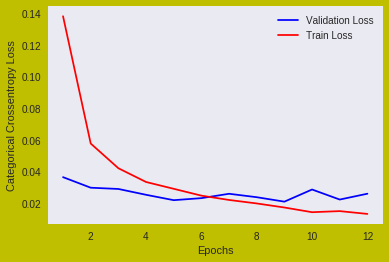

In [32]:
#evaluating model

score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)





## 2 Model2:CNN with 5 ConvNet & kernel_size=(5x5)


5 convNet  followed by maxpooling(2,2) and dropout

In [39]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 96)          0         
__________

In [42]:
#Model compilation
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 983s 16ms/step - loss: 0.6764 - acc: 0.7753 - val_loss: 0.2016 - val_acc: 0.9378
Epoch 2/12
60000/60000 [==============================] - 981s 16ms/step - loss: 0.2034 - acc: 0.9396 - val_loss: 0.0988 - val_acc: 0.9679
Epoch 3/12
60000/60000 [==============================] - 989s 16ms/step - loss: 0.1265 - acc: 0.9634 - val_loss: 0.0604 - val_acc: 0.9821
Epoch 4/12
60000/60000 [==============================] - 985s 16ms/step - loss: 0.0895 - acc: 0.9740 - val_loss: 0.0415 - val_acc: 0.9863
Epoch 5/12
60000/60000 [==============================] - 977s 16ms/step - loss: 0.0737 - acc: 0.9792 - val_loss: 0.0374 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 970s 16ms/step - loss: 0.0607 - acc: 0.9823 - val_loss: 0.0290 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 970s 16ms/step - loss: 0.0521 - acc: 0.9851 - val_loss: 0.

test score : 0.023384571030837107
test Accuracy : 0.993


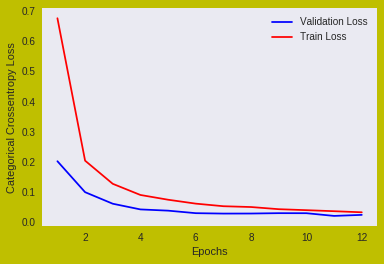

In [43]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)





## 3 Model3:CNN with 7 ConvNet & kernel_size=(2x2)


5 convNet  followed by maxpooling(2,2) and dropout

In [49]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 7, 7, 96)          0         
__________

In [50]:
#Model compilation
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 168s 3ms/step - loss: 1.9486 - acc: 0.3600 - val_loss: 0.8981 - val_acc: 0.6529
Epoch 2/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.4479 - acc: 0.8694 - val_loss: 0.0940 - val_acc: 0.9737
Epoch 3/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1987 - acc: 0.9485 - val_loss: 0.0649 - val_acc: 0.9835
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1433 - acc: 0.9640 - val_loss: 0.0442 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1137 - acc: 0.9715 - val_loss: 0.0675 - val_acc: 0.9833
Epoch 6/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1026 - acc: 0.9748 - val_loss: 0.0373 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0904 - acc: 0.9783 - val_loss: 0.0384 - 

test score : 0.032985285274824125
test Accuracy : 0.9926


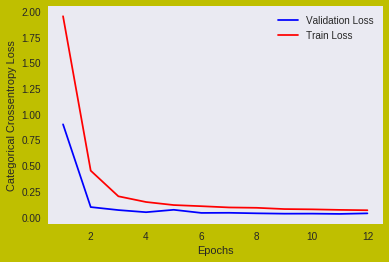

In [51]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)





# Observation

In [53]:
from prettytable import PrettyTable
models=['3ConvNet with kernel 3x3',
        '5ConvNet with kernel 5x5',
        '7ConvNet with kernel 2x2']
training_accuracy=[train_accuracy3,train_accuracy5,train_accuracy7]
test_accuracy=[test_accuracy3,test_accuracy5,test_accuracy7]
INDEX = [1,2,3]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
#Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)
     

+--------+--------------------------+--------------------+------------------+
| INDEX. |        MODEL_NAME        | TRAINING ACCURACY  | TESTING ACCURACY |
+--------+--------------------------+--------------------+------------------+
|   1    | 3ConvNet with kernel 3x3 | 0.9957166666666667 |      0.9938      |
|   2    | 5ConvNet with kernel 5x5 | 0.9905000000317892 |      0.993       |
|   3    | 7ConvNet with kernel 2x2 | 0.9844166666348775 |      0.9926      |
+--------+--------------------------+--------------------+------------------+


* from graphs in model1,model2 and model 3
model3 gives best plot amongst other model.
* Non_trainable params:
       Model1=0
       Model2=512
       Model3=1064
* The Training time for model2 and model1 is very high comapratively model3. 
* Model performance with three different CNN model is shown in above table.
